<a href="https://colab.research.google.com/github/McGKoe/Rad/blob/main/Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import os
from google.colab import files
from collections import  Counter
import glob
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack
from time import time

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
uploaded = files.upload()

Saving open_ave_data.csv to open_ave_data.csv


In [5]:
temp = pd.read_csv('open_ave_data.csv', engine = 'python', nrows = 957, index_col = 0)

In [6]:
# remove duplicates
corpus = temp.drop_duplicates()

In [7]:
corpus.dropna(inplace=True)

In [8]:
corpus.describe()

,ReportText,findings,clinicaldata,ExamName,impression
count,950,950,950,950,950
unique,950,406,367,732,486
top,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST 2 VIEW\n\nCOMPARISON: None.,IMPRESSION: Normal single view chest.
freq,1,174,84,35,160


In [9]:
corpus = corpus.apply(lambda x: x.astype(str).str.lower())

In [10]:
# results are crazy accurate, remove label from each cell

corpus['findings'] = corpus['findings'].str.replace('findings', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('clinical', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('clinical data', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('indication', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('history', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('data', '')
corpus['clinicaldata'] = corpus['clinicaldata'].str.replace('information', '')
corpus['ExamName'] = corpus['ExamName'].str.replace('exam', '')
corpus['impression'] = corpus['impression'].str.replace('impression', '')


In [11]:
corpus.head(2)

,ReportText,findings,clinicaldata,ExamName,impression
0,exam: chest radiography exam date: 06/01/2019 ...,: lungs/pleura: no focal opacities evident. no...,: cough. \n\n,: chest radiography date: 06/01/2019 08:30 pm...,: normal 2-view chest radiography.
1,exam: chest radiography exam date: 05/23/2020 ...,: lungs/pleura: no focal opacities evident. no...,: chest pain. \n\n,: chest radiography date: 05/23/2020 12:03 pm...,: no acute cardiopulmonary abnormality.


In [12]:
findings = corpus['findings'].tolist()
clinicaldata = corpus['clinicaldata'].tolist()
examname = corpus['ExamName'].tolist()
impression = corpus['impression'].tolist()

In [13]:
corpus = findings + clinicaldata + examname + impression

In [14]:
## Tf-Idf (advanced variant of BoW)
vectoriser = feature_extraction.text.TfidfVectorizer(max_features=100)

In [15]:
# fit_transform is a combination of the fit method and the transform method
# use fit_transform method to learn vocabulary and idf, return document-term matrix
X = vectoriser.fit_transform(corpus)

In [16]:
# show feature names
vectoriser.get_feature_names_out()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '2018', '2019', '2020', '2021', 'abnormality', 'acute', 'am',
       'and', 'ap', 'are', 'breath', 'by', 'cardiomediastinal',
       'cardiopulmonary', 'chest', 'clear', 'comparison', 'consolidation',
       'contour', 'contours', 'cough', 'date', 'dated', 'dictated',
       'disease', 'effusion', 'effusions', 'electronically', 'evidence',
       'evident', 'exam', 'focal', 'for', 'heart', 'in', 'infiltrate',
       'is', 'lateral', 'left', 'limitations', 'limits', 'lung', 'lungs',
       'md', 'mediastinal', 'mediastinum', 'no', 'none', 'normal', 'of',
       'on', 'opacities', 'or', 'osseous', 'other', 'pa', 'pain',
       'personalname', 'pleura', 'pleural', 'pm', 'pneumothorax',
       'portable', 'process', 'pulmonary', 'radiography', 'right',
       'shortness', 'signed', 'significant', 'silhouette', 'single',
       'size', 'stable', 'structures', 'technique', 'the', 'there',
       'time', 'tu

In [17]:
X.toarray

<bound method _cs_matrix.toarray of <3800x100 sparse matrix of type '<class 'numpy.float64'>'
	with 33100 stored elements in Compressed Sparse Row format>>

In [18]:
X.shape

(3800, 100)

In [19]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=4).fit_transform(X)

In [20]:
X_embedded

array([[ 46.670242 , -21.34493  ],
       [ -9.391765 ,  15.046074 ],
       [ 46.513348 , -21.51199  ],
       ...,
       [ 24.881994 ,   2.1718485],
       [ 23.588417 ,  60.474255 ],
       [-42.389748 , -30.100346 ]], dtype=float32)

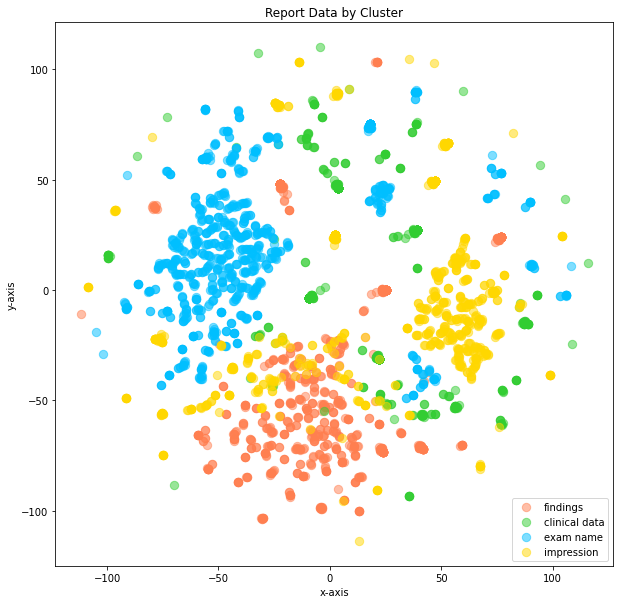

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))

# x and y values for the first scatter plot
x1 = X_embedded[0:949, 1]
y1 = X_embedded[0:949, 0]

# x and y values for the second scatter plot
x2 = X_embedded[950:1899, 1]
y2 = X_embedded[950:1899, 0]

# third 
x3 = X_embedded[1900:2849, 1]
y3 = X_embedded[1900:2849, 0]

# fourth
x4 = X_embedded[2850:3800, 1]
y4 = X_embedded[2850:3800, 0]

# first scatter plot
plt.scatter(x1, y1, c ="coral", marker ="o", s = 70, alpha=0.5)

# second
plt.scatter(x2, y2, c ="limegreen", marker ="o", s = 70, alpha=0.5)

# third
plt.scatter(x3, y3, c ="deepskyblue", marker ="o", s = 70, alpha=0.5)

# fourth
plt.scatter(x4, y4, c ="gold", marker ="o", s = 70, alpha=0.5)


plt.title('Report Data by Cluster')
plt.legend(["findings", "clinical data", "exam name", "impression"], loc ="lower right")

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

In [ ]:
# X = tfidf matrix

In [22]:
X.shape

(3800, 100)

In [23]:
print(X)

  (0, 59)	0.16150455244211886
  (0, 66)	0.2129639771134201
  (0, 93)	0.24265688512944303
  (0, 21)	0.1961071665746259
  (0, 31)	0.25224145505695267
  (0, 56)	0.24340485932216624
  (0, 19)	0.17192998444882876
  (0, 45)	0.20476897140859285
  (0, 57)	0.20911328563743536
  (0, 96)	0.28121796938848836
  (0, 60)	0.14787276214453304
  (0, 73)	0.17726975118879804
  (0, 37)	0.1840955479870798
  (0, 71)	0.17410298187061307
  (0, 41)	0.2304600589205553
  (0, 63)	0.22086932961050432
  (0, 43)	0.2132818932180978
  (0, 58)	0.414736655570248
  (0, 70)	0.21522201175438968
  (0, 54)	0.1756222864836202
  (1, 78)	0.27672854659409873
  (1, 89)	0.23559891796343044
  (1, 48)	0.3457873976085344
  (1, 30)	0.22419088804303652
  (1, 24)	0.20101214662676953
  :	:
  (3798, 35)	0.7621194795641035
  (3798, 55)	0.019352319281991326
  (3798, 33)	0.31399208826917224
  (3798, 69)	0.015068337085760736
  (3798, 25)	0.017405046191253798
  (3798, 23)	0.015204263223920135
  (3798, 91)	0.06720481245852791
  (3798, 52)	0.0191

In [24]:
  height = 3800
  y = pd.DataFrame(0, index=range(height), columns=range(1))

In [25]:
y.shape

(3800, 1)

In [26]:
y.loc[0:949,""]= 'findings'
y.loc[950:1899,""]= 'clinicaldata'
y.loc[1900:2849,""]= 'examname'
y.loc[2850:3799,""]= 'impression'

In [27]:
print(y)
y_saved = y

      0            
0     0    findings
1     0    findings
2     0    findings
3     0    findings
4     0    findings
...  ..         ...
3795  0  impression
3796  0  impression
3797  0  impression
3798  0  impression
3799  0  impression

[3800 rows x 2 columns]


In [28]:
df_y = pd.DataFrame.from_records(y)

In [29]:
df_y.head()

,0,
0,0,findings
1,0,findings
2,0,findings
3,0,findings
4,0,findings


In [30]:
y.rename(columns = {'':'y'}, inplace = True)

In [31]:
y.drop(columns=[0], inplace = True)

In [32]:
print(y)
y_saved = y

               y
0       findings
1       findings
2       findings
3       findings
4       findings
...          ...
3795  impression
3796  impression
3797  impression
3798  impression
3799  impression

[3800 rows x 1 columns]


In [33]:
df_X = pd.DataFrame (corpus, columns = ['X'])

In [34]:
df_all = pd.concat([df_X, y], axis=1)

In [35]:
msk = np.random.rand(len(df_all)) < 0.66

train = df_all[msk]

test = df_all[~msk]

In [36]:
train.describe()

,X,y
count,2570,2570
unique,1338,4
top,: lungs/pleura: no focal opacities evident. no...,findings
freq,122,652


In [37]:
test.describe()

,X,y
count,1230,1230
unique,742,4
top,: normal single view chest.,impression
freq,55,316


In [38]:
train_text = train['X']

In [39]:
train.shape

(2570, 2)

In [40]:
test_text = test['X']
test.shape

(1230, 2)

In [41]:
y = train['y']
y_saved = y

In [42]:
print(y)

1         findings
2         findings
3         findings
4         findings
5         findings
           ...    
3795    impression
3796    impression
3797    impression
3798    impression
3799    impression
Name: y, Length: 2570, dtype: object


In [43]:
all_text = pd.concat([train_text, test_text])

In [44]:
# tf-idf vectors

In [45]:
word_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', sublinear_tf=True, strip_accents='unicode', 
                                  stop_words='english', ngram_range=(1, 1), max_features=100)
word_vectorizer.fit(train_text)

train_word_features = word_vectorizer.transform(train_text)

In [46]:
train_features = hstack([train_word_features])

In [47]:
# hyperparameter tuning of logistic regression

In [99]:
train.describe()

test.describe()

train_text = train['X']

train.shape

test_text = test['X']
test.shape

y = train['y']

all_text = pd.concat([train_text, test_text])

train_text = train['X']

train.shape

test_text = test['X']
test.shape

y = train['y']

all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', sublinear_tf=True, strip_accents='unicode', 
                                  stop_words='english', ngram_range=(1, 1), max_features=100)
word_vectorizer.fit(train_text)

train_word_features = word_vectorizer.transform(train_text)

train_features = hstack([train_word_features])

X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3 ,random_state=1234)


lr_model = LogisticRegression(random_state=1234)
param_dict = {'C': [0.001, 0.01, 0.1, 1, 10],
             'solver': ['sag', 'lbfgs', 'saga']}

start = time()
grid_search = GridSearchCV(lr_model, param_dict)

grid_search.fit(X_train, y_train.astype(str))
print("GridSearch took %.2f seconds to complete." % (time()-start))
display(grid_search.best_params_)
print("Cross-Validated Score of the Best Estimator: %.3f" % grid_search.best_score_)

GridSearch took 2.22 seconds to complete.


{'C': 10, 'solver': 'sag'}

Cross-Validated Score of the Best Estimator: 0.988


In [49]:
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(X_train, y_train)
lr_preds=lr.predict(X_test)

print('confustion matrix:', '\n', 'fin. cli. exa. imp.', '\n', confusion_matrix(y_test, lr_preds, labels=["findings", "clinicaldata", "examname", "impression"]), '\n\n')

print('classification report:', '\n', classification_report(y_test, lr_preds), '\n\n')

print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

confustion matrix: 
 fin. cli. exa. imp. 
 [[206   1   0   2]
 [  1 185   2   1]
 [  0   0 163   0]
 [  3   2   0 205]] 


classification report: 
               precision    recall  f1-score   support

clinicaldata       0.98      0.98      0.98       189
    examname       0.99      1.00      0.99       163
    findings       0.98      0.99      0.98       209
  impression       0.99      0.98      0.98       210

    accuracy                           0.98       771
   macro avg       0.98      0.99      0.98       771
weighted avg       0.98      0.98      0.98       771
 


Accuracy Score: 0.984


In [50]:
# precision: measure of a classifier’s exactness
# per class, ratio of true positives to the sum of true and false positives
# “for all instances classified positive, what percent was correct?”

In [51]:
# recall: measure of the classifier’s completeness
# can a classifier correctly find all positive instances?
# per class, ratio of true positives to the sum of true positives and false negatives
# “for all instances that were actually positive, what percent was classified correctly?”

In [52]:
# f1 score: weighted harmonic mean of precision and recall 
# best score is 1.0 and worst is 0.0
# F1 typically lower than accuracy 
# weighted average of F1 better for comparison of classifier models (not accuracy)

In [53]:
# support: number of actual occurrences of the class in the specified dataset
# imbalanced support in training data => possible structural weaknesses in classifier reported scores
# could indicate the need for stratified sampling or rebalancing
# doesn’t change between models, does diagnose evaluation process

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 720x720 with 0 Axes>

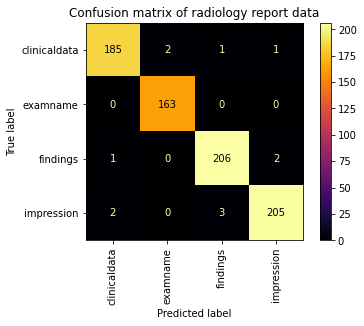

In [51]:
cm = confusion_matrix(y_test, lr_preds, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
plt.figure(figsize=(10, 10))
disp.plot(cmap='inferno', xticks_rotation='vertical')
plt.title('Confusion matrix of radiology report data')
plt.show()

In [52]:
# Modelling report sections from text
word_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', sublinear_tf=True, strip_accents='unicode', 
                                  stop_words='english', ngram_range=(1, 1), max_features=10000)
word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [53]:
train_features = hstack([train_word_features])
test_features = hstack([test_word_features])

In [54]:
lr=LogisticRegression(C=1,solver='saga')
lr.fit(train_features,y)
final_preds=lr.predict(test_features)

In [55]:
test['y'] = final_preds
test = test[['X', 'y']]

In [56]:
test['y'].value_counts()

impression      313
clinicaldata    310
examname        307
findings        300
Name: y, dtype: int64

In [57]:
## Word2Vec Model Training

In [58]:
from gensim.models import Word2Vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('open_ave_data.csv')
#df['labels'] = y_saved

In [59]:
df.head()

#df['ReportText'] = df['ReportText'].str.replace('findings', '')
#df['clinicaldata'] = df['ReportText'].str.replace('clinical', '')
#df['clinicaldata'] = df['ReportText'].str.replace('clinical data', '')
#df['clinicaldata'] = df['ReportText'].str.replace('indication', '')
#df['clinicaldata'] = df['ReportText'].str.replace('history', '')
#df['clinicaldata'] = df['ReportText'].str.replace('data', '')
#df['clinicaldata'] = df['ReportText'].str.replace('information', '')
#df['ReportText'] = df['ReportText'].str.replace('exam', '')
#df['ReportText'] = df['ReportText'].str.replace('impression', '')



,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.


In [67]:
new_findings = [word for line in findings for word in line.split()]
new_findings = [*set(new_findings)]

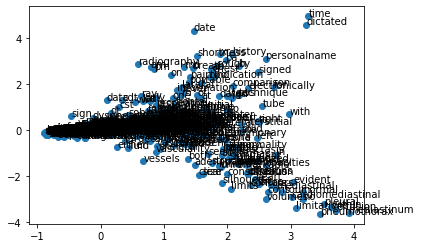

In [82]:
# Word Vectors of all report text

clean = []
for w in range(len(df.ReportText)):
   desc = df['ReportText'][w].lower()

   #remove punctuation
   desc = re.sub('[^a-zA-Z]', ' ', desc)

   #remove tags
   desc=re.sub("&lt;:/?.*?&gt;"," &lt;&gt; ",desc)

   #remove digits and special chars
   desc=re.sub("(\\d|\\W)+"," ",desc)
   clean.append(desc)

df['clean'] = clean

df['clean'] = df['clean'].str.replace('findings', '')
df['clean'] = df['clean'].str.replace('clinical', '')
df['clean'] = df['clean'].str.replace('clinical data', '')
df['clean'] = df['clean'].str.replace('exam', '')
df['clean'] = df['clean'].str.replace('impression', '')
df['clean'] = df['clean'].str.replace('history', '')


df.head()

corpus = []
for col in df.clean:
   word_list = str(col).split(" ")
   corpus.append(word_list)

#show first value
corpus[0:1]

#generate vectors from corpus
model = Word2Vec(corpus, min_count=1, vector_size = 1000)

X = model.wv.vectors
#X = model[model.wv.key_to_index]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [83]:
df.head()

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression,clean
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.,chest radiography date pm history cough com...
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...,chest radiography date pm history chest pai...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.,chest radiography date pm history chest pai...
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear,chest portable history chest pain comparison ...
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.,chest radiography date pm history chest pai...


In [67]:
## Generate the linear Regression model for the word vectors

In [85]:
def get_sentence_vectors(text):
  tokens = text.split()
  vectors = []
  for token in tokens:
    if token in model.wv.index_to_key:
      vectors.append(model.wv[token])
  if len(vectors) > 0:
     return np.mean(vectors, axis=0)
  else:
    return np.zeros((model.vector_size,))

In [111]:
corpus = findings + clinicaldata + examname + impression


X = np.array([get_sentence_vectors(text) for text in corpus])

height = 3800
y = pd.DataFrame(0, index=range(height), columns=range(1))
y.loc[0:949,""]= 'findings'
y.loc[950:1899,""]= 'clinicaldata'
y.loc[1900:2849,""]= 'examname'
y.loc[2850:3799,""]= 'impression'

y.rename(columns = {'':'y'}, inplace = True)
y.drop(columns=[0], inplace = True)
df_y = pd.DataFrame.from_records(y)


print(X)

[[ 0.04562467 -0.00810951  0.3368679  ...  0.14255065  0.0336984
  -0.09223176]
 [ 0.05546605 -0.00719061  0.29127741 ...  0.09714615  0.01817156
  -0.06241086]
 [ 0.04562467 -0.00810951  0.3368679  ...  0.14255065  0.0336984
  -0.09223176]
 ...
 [ 0.05392231 -0.03031723  0.26179266 ...  0.07385112  0.04904465
  -0.09353912]
 [ 0.17740935  0.09416377  0.06656057 ... -0.26474443 -0.01660539
  -0.04566934]
 [ 0.11626275  0.03108398  0.11121266 ... -0.07483193 -0.0092175
  -0.04749355]]


In [112]:
df_y = pd.DataFrame.from_records(y)

In [113]:
df_X = pd.DataFrame (corpus, columns = ['X'])

df_all = pd.concat([df_X, y], axis=1)

msk = np.random.rand(len(df_all)) < 0.66

train = df_all[msk]

test = df_all[~msk]

train.describe()

test.describe()

train_text = train['X']

train.shape

test_text = test['X']
test.shape

#y = train['y']

all_text = pd.concat([train_text, test_text])

train_text = train['X']

train.shape

test_text = test['X']
test.shape

train_y = train['y']

all_text = pd.concat([train_text, test_text])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(train_text, train_y,test_size=0.3 ,random_state=1234)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=1234)

In [115]:
lr_model = LogisticRegression(random_state=1234)
param_dict = {'C': [0.001, 0.01, 0.1, 1, 10],
             'solver': ['sag', 'lbfgs', 'saga']}

start = time()
grid_search = GridSearchCV(lr_model, param_dict)

grid_search.fit(X_train, y_train.astype(str))
print("GridSearch took %.2f seconds to complete." % (time()-start))
display(grid_search.best_params_)
print("Cross-Validated Score of the Best Estimator: %.3f" % grid_search.best_score_)

GridSearch took 186.67 seconds to complete.


{'C': 10, 'solver': 'lbfgs'}

Cross-Validated Score of the Best Estimator: 0.851


In [107]:
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(X_train, y_train)
lr_preds=lr.predict(X_test)

print('confustion matrix:', '\n', 'fin. cli. exa. imp.', '\n', confusion_matrix(y_test, lr_preds, labels=["findings", "clinicaldata", "examname", "impression"]), '\n\n')

print('classification report:', '\n', classification_report(y_test, lr_preds), '\n\n')

print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

ValueError: ignored

<Figure size 720x720 with 0 Axes>

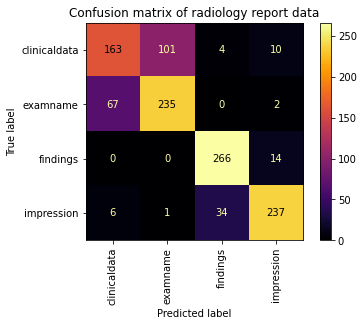

In [92]:
cm = confusion_matrix(y_test, lr_preds, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
plt.figure(figsize=(10, 10))
disp.plot(cmap='inferno', xticks_rotation='vertical')
plt.title('Confusion matrix of radiology report data')
plt.show()